In [2]:
from thinkbayes2 import *
import numpy as np
%matplotlib inline
from matplotlib import pyplot

In [17]:
y = 0.1 # probability of flipping heads and tails

In [16]:
class Euro(Suite):
    def Likelihood(self, data, hypo):
        '''
        
        assume hypo to be the probabiliy
        '''
        x = hypo
        if data == 'H':
            return hypo 
        else:
            return 1 - hypo

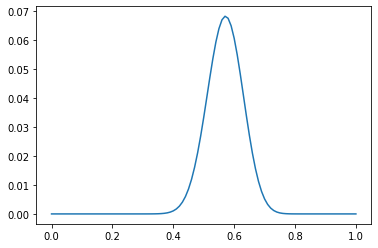

In [18]:
my_coin = Euro(np.linspace(0., 1., num=101))
for outcome in 'H' * 40 + 'T' * 30:
    my_coin.Update(outcome)
pyplot.plot(*my_coin.Render())


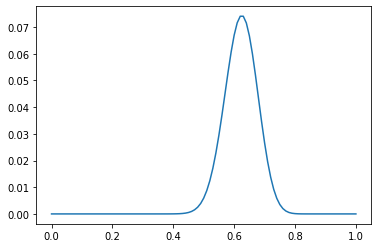

In [54]:
beta_coin = Beta()
beta_coin.Update((50, 30))
# pyplot.plot(*beta_coin.Render())
fig, ax = pyplot.subplots()
ax.plot(*zip(*beta_coin.MakePmf().SortedItems()))

# 4.1

In [60]:
class EuroModified(Suite):
    def __init__(self, hypos, y):
        Suite.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()
        self.y = y
        
    def Likelihood(self, data, hypo):
        '''
        data is either head or tails
        assume hypo to be the probabiliy
        '''
        x = hypo
        if data == 'H':
            return hypo * (1 - self.y) + (1 - hypo) * self.y
        else:
            return (1. - hypo) * (1 - self.y) + hypo * self.y

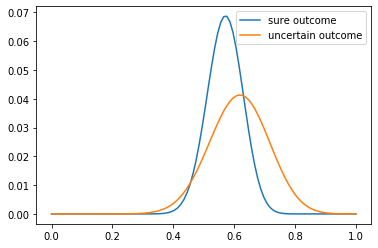

In [69]:
my_coin = Euro(np.linspace(0., 1., num=100))
my_coin_y = EuroModified(np.linspace(0., 1., num=100), 0.2)
for outcome in 'H' * 40 + 'T' * 30:
    my_coin.Update(outcome)
    my_coin_y.Update(outcome)
ax = pyplot.plot(*my_coin.Render(), label='sure about outcome')
pyplot.plot(*my_coin_y.Render())
pyplot.legend(['sure outcome', 'uncertain outcome'])


# 4.2

In [34]:
class Credibility(Suite):
    def __init__(self, alpha=1, beta=1):
        Suite.__init__(self)
        for hypo, prob in Beta(alpha, beta).MakePmf(101).SortedItems():
            self.Set(hypo, prob)
        self.Normalize()
                
    def Likelihood(self, data, hypo):
        '''
        data is either head or tails
        assume hypo to be the probabiliy
        '''
        vote, expected_credibility = data
        if vote == 'up':
            likelyhood = hypo * expected_credibility + (1 - hypo) * (1 - expected_credibility)
        else:
            likelyhood = (1. - hypo) * expected_credibility + hypo * (1 - expected_credibility)
#         print((vote, hypo, likelyhood))
        return likelyhood

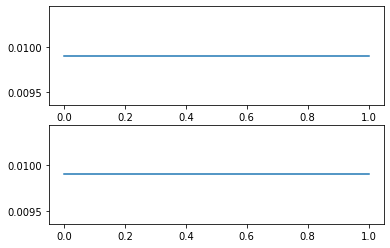

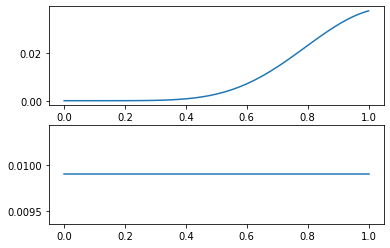

In [43]:
link_credibility = Credibility()
user_credibility = Credibility()

fig, ax = pyplot.subplots(2)
ax[0].plot(*zip(*link_credibility.SortedItems()))
ax[1].plot(*zip(*user_credibility.SortedItems()))

link_credibility.Update(('up', .9))
link_credibility.Update(('down', .7))

for i in range(10):
    link_credibility.Update(('up', .9))
for i in range(15):
    link_credibility.Update(('down', .6))
# link_credibility.Update(('up', .9))
fig, ax = pyplot.subplots(2)
ax[0].plot(*zip(*link_credibility.SortedItems()))
ax[1].plot(*zip(*user_credibility.SortedItems()))

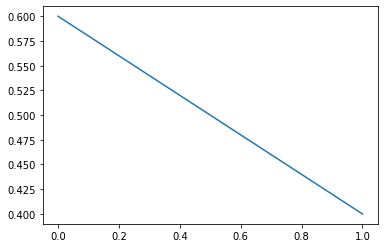

In [47]:


pyplot.plot(
    np.linspace(0., 1., 101),
    [link_credibility.Likelihood(('up', .4), hypo_val) for hypo_val in np.linspace(0., 1., 101)]
)
